In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
from keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
from keras.metrics import Precision, Recall

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pickle
from collections import Counter

In [ ]:
def find_max_list(list):
    list_len = [len(i) for i in list]
    print(max(list_len))

In [ ]:
df = pd.read_csv('/content/final_data_training_done.csv')
df.drop('Unnamed: 0',axis=1)
#df.head()

,Tweet,Sentimen
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
18703,jadi kita harus makin dulu di kfc sebesar 60 r...,neutral
18704,tante kapan nikah akun rp panggil calon istri ...,neutral
18705,pelik tengok orang zaman sekarang nih dulu kem...,negative
18706,menikah itu belum tentu harus sudah pernah pac...,neutral


In [ ]:
results = Counter() 
hitung_sp_char = df['Tweet'].str.lower().str.split().apply(results.update) 
print(len(results)) 

29170


In [ ]:
max_features = 29200
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Tweet'].values)
X = tokenizer.texts_to_sequences(df['Tweet'].values)

In [ ]:
with open('token.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)
  print('tokenizer.pickle has been created')

tokenizer.pickle has been created


In [ ]:
find_max_list(X)

95


In [ ]:
XX = pad_sequences(X, maxlen=128) #padding

In [ ]:
Y = pd.get_dummies(df['Sentimen']).values

In [ ]:
print(Y)

[[0 0 1]
 [0 1 0]
 [0 0 1]
 ...
 [1 0 0]
 [0 1 0]
 [0 1 0]]


In [ ]:
X_Train, X_Test, y_train, y_test = train_test_split(XX,Y,test_size=0.2,random_state=42)

In [ ]:
embed_dim = 128
lstm_out = 196

"""model = Sequential()
model.add(Embedding(max_features, embed_dim))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2, input_length=XX.shape[1]))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())"""

units = 196

model = Sequential()
model.add(Embedding(max_features,embed_dim, input_length=XX.shape[1]))
model.add(LSTM(units,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy',Precision(), Recall()])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 128)          3737600   
                                                                 
 lstm_2 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 3)                 591       
                                                                 
Total params: 3,992,991
Trainable params: 3,992,991
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 32
es = EarlyStopping(monitor='var_loss', mode='min', verbose=1)
history = model.fit(X_Train,y_train, epochs=10, batch_size=10, validation_data=(X_Test,y_test), verbose=1, callbacks=[es])

Epoch 1/10
1497/1497 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7516 - precision_1: 0.7778 - recall_1: 0.7046

1497/1497 [==============================] - 695s 462ms/step - loss: 0.5600 - accuracy: 0.7516 - precision_1: 0.7778 - recall_1: 0.7046 - val_loss: 0.4403 - val_accuracy: 0.8129 - val_precision_1: 0.8184 - val_recall_1: 0.8057
Epoch 2/10
1497/1497 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.8879 - precision_1: 0.8915 - recall_1: 0.8831

1497/1497 [==============================] - 703s 470ms/step - loss: 0.2884 - accuracy: 0.8879 - precision_1: 0.8915 - recall_1: 0.8831 - val_loss: 0.4604 - val_accuracy: 0.8095 - val_precision_1: 0.8149 - val_recall_1: 0.8071
Epoch 3/10
1497/1497 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9471 - precision_1: 0.9489 - recall_1: 0.9459

1497/1497 [==============================] - 703s 469ms/step - loss: 0.1489 - accuracy: 0.9471 - precision_1: 0.9489 - recall_1: 0.9459 - val_loss: 0.5902 - val_accuracy: 0.7996 - val_precision_1: 0.8048 - val_recall_1: 0.7956
Epoch 4/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9708 - precision_1: 0.9717 - recall_1: 0.9697

1497/1497 [==============================] - 720s 481ms/step - loss: 0.0843 - accuracy: 0.9708 - precision_1: 0.9717 - recall_1: 0.9697 - val_loss: 0.6478 - val_accuracy: 0.8044 - val_precision_1: 0.8079 - val_recall_1: 0.8025
Epoch 5/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9813 - precision_1: 0.9817 - recall_1: 0.9808

1497/1497 [==============================] - 729s 487ms/step - loss: 0.0540 - accuracy: 0.9813 - precision_1: 0.9817 - recall_1: 0.9808 - val_loss: 0.7237 - val_accuracy: 0.7961 - val_precision_1: 0.8000 - val_recall_1: 0.7942
Epoch 6/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9866 - precision_1: 0.9870 - recall_1: 0.9862

1497/1497 [==============================] - 737s 492ms/step - loss: 0.0377 - accuracy: 0.9866 - precision_1: 0.9870 - recall_1: 0.9862 - val_loss: 0.8314 - val_accuracy: 0.7945 - val_precision_1: 0.7965 - val_recall_1: 0.7929
Epoch 7/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9908 - precision_1: 0.9911 - recall_1: 0.9904

1497/1497 [==============================] - 758s 506ms/step - loss: 0.0281 - accuracy: 0.9908 - precision_1: 0.9911 - recall_1: 0.9904 - val_loss: 0.8868 - val_accuracy: 0.7977 - val_precision_1: 0.7998 - val_recall_1: 0.7956
Epoch 8/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9929 - precision_1: 0.9930 - recall_1: 0.9929

1497/1497 [==============================] - 760s 508ms/step - loss: 0.0180 - accuracy: 0.9929 - precision_1: 0.9930 - recall_1: 0.9929 - val_loss: 0.9966 - val_accuracy: 0.7934 - val_precision_1: 0.7951 - val_recall_1: 0.7910
Epoch 9/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9953 - precision_1: 0.9953 - recall_1: 0.9951

1497/1497 [==============================] - 723s 483ms/step - loss: 0.0107 - accuracy: 0.9953 - precision_1: 0.9953 - recall_1: 0.9951 - val_loss: 1.1522 - val_accuracy: 0.8036 - val_precision_1: 0.8047 - val_recall_1: 0.8025
Epoch 10/10
1497/1497 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9942 - precision_1: 0.9943 - recall_1: 0.9941

1497/1497 [==============================] - 721s 481ms/step - loss: 0.0129 - accuracy: 0.9942 - precision_1: 0.9943 - recall_1: 0.9941 - val_loss: 1.0864 - val_accuracy: 0.7921 - val_precision_1: 0.7938 - val_recall_1: 0.7910


In [ ]:
model.save('lstm_sentiment_model.h5',save_format='h5')


AttributeError: ignored

In [ ]:
score = model.evaluate(X_Test,y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

117/117 [==============================] - 8s 72ms/step - loss: 1.0739 - accuracy: 0.7865
accuracy: 78.65%
accuracy: 78.65%


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_Test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7921
Precision : 0.7938
Recall    : 0.7910
F1 Score  : 0.7924


In [ ]:
import matplotlib.pyplot as plt

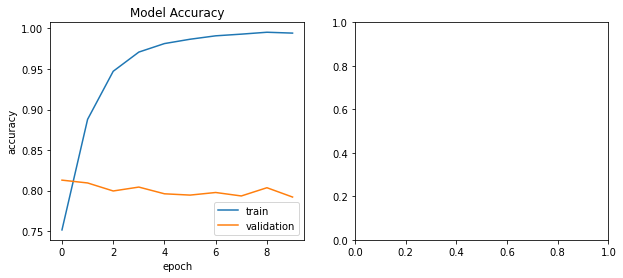

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import seaborn as sns

117/117 [==============================] - 11s 97ms/step


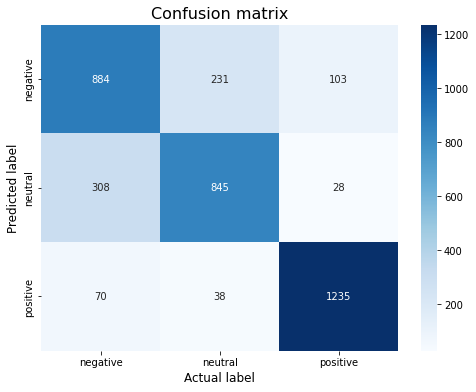

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['negative', 'neutral', 'positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_Test, y_test)